# Notebook Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

## Read in Data

In [2]:
titanic = pd.read_csv('../../../data/titanic.csv',
                      usecols=['Survived', 'Name', 'Sex', 'Cabin', 'Embarked'])
titanic.head()

,Survived,Name,Sex,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C
2,1,"Heikkinen, Miss. Laina",female,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S
4,0,"Allen, Mr. William Henry",male,NaN,S


## Plot Categorical Features

In [4]:
# Create a title feature by parsing passenger name anf=d create a cabin indicator variable
titanic['Title_Raw'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title'] = titanic['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic["Cabin_ind"] = np.where(titanic["Cabin"].isnull(), 0, 1)
titanic.head()

,Survived,Name,Sex,Cabin,Embarked,Title_Raw,Title,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,NaN,S,Mr,Mr,0


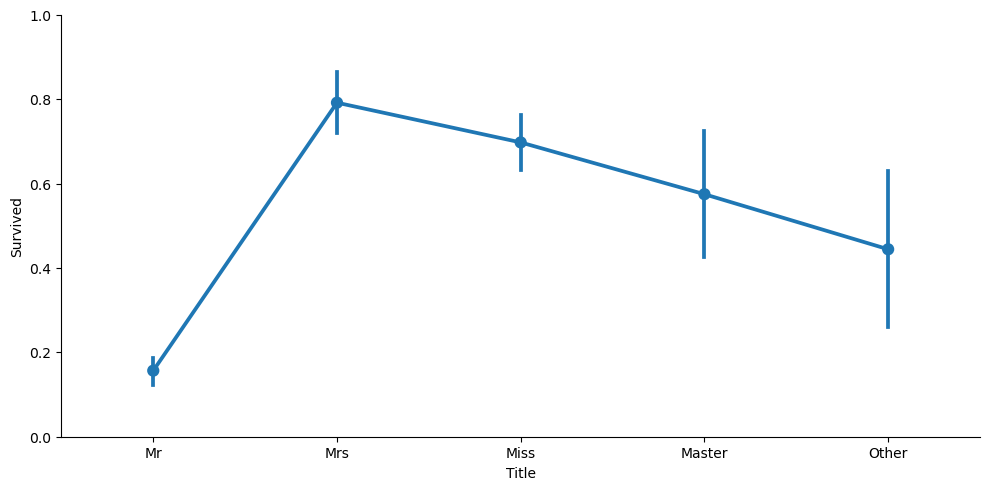

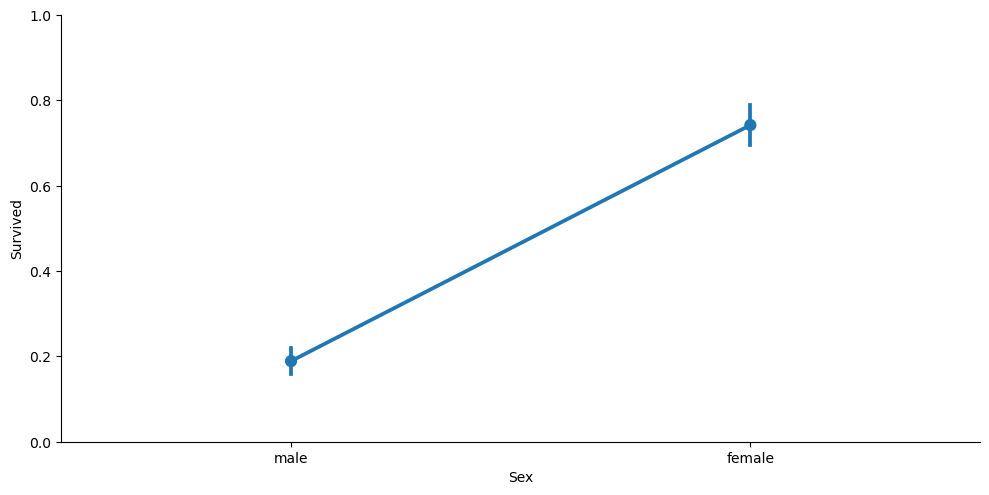

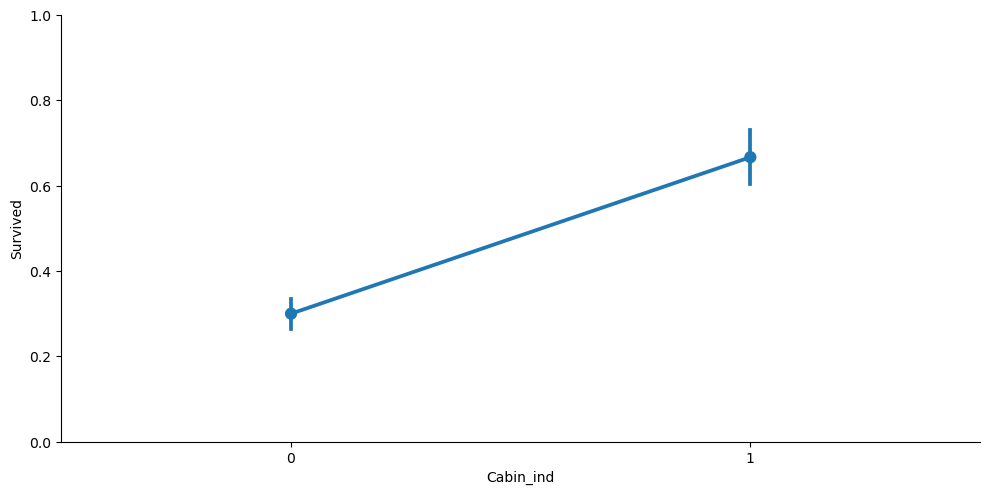

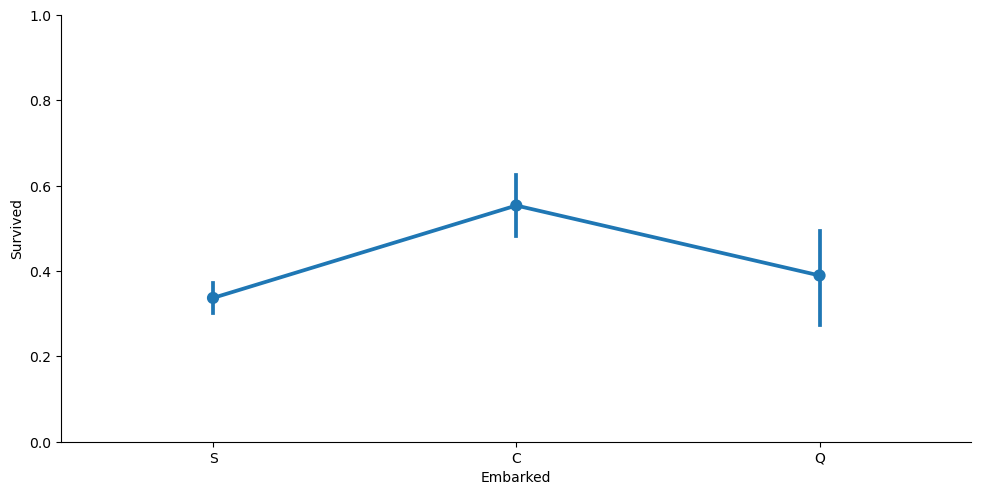

In [5]:
# Generate categorical plots for features
for col in ["Title", "Sex", "Cabin_ind", "Embarked"]:
    sns.catplot(x=col, y="Survived", data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [6]:
# Split embarked by whether the passenger had a cabin
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129
